In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_classes = 7

In [3]:
data = pd.read_csv('fer2013/fer2013.csv')

In [4]:
data = data.drop('Usage', axis=1)

In [5]:
# temporary! Only use part of the data for analysis
#data = data[0:8000]

In [6]:
data['pixels'] = data['pixels'].str.split()

In [7]:
features = np.zeros( (len(data['pixels']), 2304) )

In [8]:
for i in range(len(data['pixels'])):
    features[i] = data['pixels'][i]

In [9]:
features = features.reshape(len(features), 48, 48, 1)

In [10]:
labels = np.array(data['emotion'])
labels_one_hot = np.zeros( (len(labels), num_classes) )
for i in range(len(labels)):
    labels_one_hot[i][labels[i]] = 1
labels = labels_one_hot

In [11]:
labels[15].shape

(7,)

In [12]:
labels.shape

(35887, 7)

In [13]:
features_flipped = np.zeros( (len(features), 48, 48, 1) )
labels_more = np.zeros( (len(labels), num_classes ))
for i in range(len(features)):
    features_flipped[i] = np.flip(features[i], axis=1)
    labels_more[i] = labels[i]

In [14]:
features = np.append(features_flipped, features, axis=0)
labels = np.append(labels_more, labels, axis=0)

In [15]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)

[0. 0. 1. 0. 0. 0. 0.]


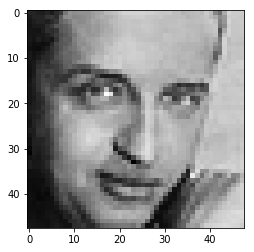

In [16]:
plt.imshow(features_train[17].reshape(48,48), cmap='gray')
print(labels[17])

# Fun Part, Writing/Training/Testing the Model

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD
from keras import regularizers

In [4]:
def create_model():
    model = Sequential()
    
    # Layer 1: Conv -> Relu -> MaxPool (32 filters)
    model.add(Conv2D(32, (3,3), input_shape=(48,48,1), kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(MaxPooling2D( (2,2) ))
    
    # Layer 2: Conv -> Relu -> MaxPool (64 filters)
    model.add(Conv2D(64, (3,3), kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(MaxPooling2D( (2,2) ))
    
    # Layer 3: Conv -> Relu -> MaxPool (96 filters)
    model.add(Conv2D(96, (3,3), kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(MaxPooling2D( (2,2) ))
    
    # Layer 4: Conv -> Relu -> MaxPool (128 filters)
    model.add(Conv2D(128, (3,3), kernel_regularizer=regularizers.l2(0.001)))
    model.add(BatchNormalization(axis=-1))
    model.add(Activation('relu'))
    #model.add(Dropout(0.2))
    model.add(MaxPooling2D( (2,2) ))
    
    # Layer 5: 200 Unit FC
    model.add(Flatten())
    model.add(Dense(200))
    #model.add(Dropout(0.2))
    model.add(Activation('relu'))
        
    # Layer 6: FC -> Softmax Classification
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    return model

In [294]:
#model = create_model()

In [256]:
#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [1]:
from keras.models import load_model
model = load_model("moodtrackr/model.h5")

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [266]:
#model.fit(features_train, labels_train, epochs=1, batch_size=128)

Epoch 1/1
64596/64596 [==============================] - 1620s 25ms/step - loss: 1.0665 - acc: 0.6622


In [42]:
print(model.evaluate(features_test, labels_test))

7178/7178 [==============================] - 13s 2ms/step
[1.2479577076471626, 0.5869322931510753]


In [ ]:
import h5py
model.save("model_stamp.h5")

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization_45 (Batc (None, 46, 46, 32)        128       
_________________________________________________________________
activation_59 (Activation)   (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 21, 21, 64)        18496     
_________________________________________________________________
batch_normalization_46 (Batc (None, 21, 21, 64)        256       
_________________________________________________________________
activation_60 (Activation)   (None, 21, 21, 64)        0         
__________

In [5]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)